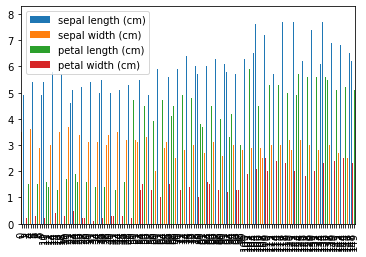

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
iris=load_iris()
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df.plot(kind='bar')
plt.show()

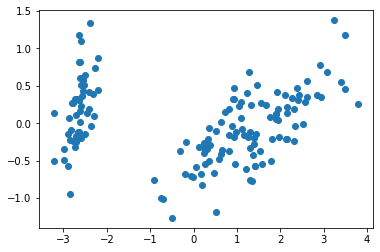

In [2]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca_df=pca.fit_transform(df)
type(pca_df)
plt.scatter(pca_df[:,0],pca_df[:,1])

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.361387,-0.084523,0.856671,0.358289
1,0.656589,0.730161,-0.173373,-0.075481


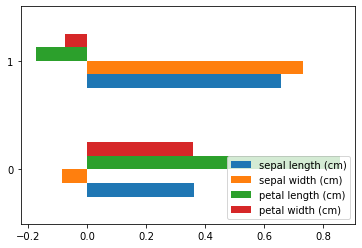

In [7]:
pca.components_
comps=pd.DataFrame(pca.components_,columns=df.columns.tolist())
comps.plot(kind='barh');
comps

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


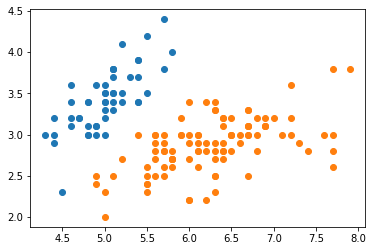

In [3]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN(eps=1,min_samples=4)
dbscan.fit(df)
print(dbscan.labels_)

plt.scatter(df[dbscan.labels_ == 0].iloc[:,0],df[dbscan.labels_ == 0].iloc[:,1],label='blue')
plt.scatter(df[dbscan.labels_ == 1].iloc[:,0],df[dbscan.labels_ == 1].iloc[:,1],label='green')

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149]


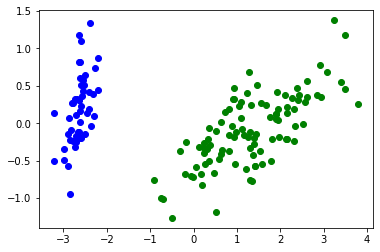

In [4]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN(eps=1,min_samples=4)
dbscan.fit(pca_df)
print(dbscan.labels_)
#print(dbscan.cluster_centers_)
dbscan_df=pd.DataFrame(pca_df)
plt.scatter(dbscan_df[dbscan.labels_ == 0].iloc[:,0],dbscan_df[dbscan.labels_ == 0].iloc[:,1],color='blue')
plt.scatter(dbscan_df[dbscan.labels_ == 1].iloc[:,0],dbscan_df[dbscan.labels_ == 1].iloc[:,1],color='green')
plt.scatter(dbscan_df[dbscan.labels_ == 2].iloc[:,0],dbscan_df[dbscan.labels_ == 2].iloc[:,1],color='red')

#DBSCAN has no predict
print(dbscan.core_sample_indices_)

You have to mention the Number of clusters
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]
[[ 2.34652659  0.27393856]
 [-2.64241546  0.19088505]
 [ 0.66567601 -0.3316042 ]]
predicting label


array([1])

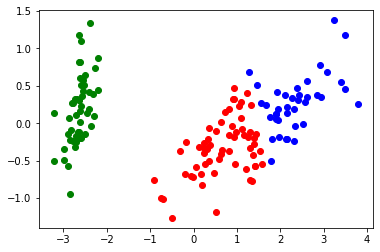

In [5]:
from sklearn.cluster import KMeans

print("You have to mention the Number of clusters")
kmeans=KMeans(n_clusters=3)
kmeans.fit(pca_df)
print(kmeans.labels_)
print(kmeans.cluster_centers_)
kmeans_df=pd.DataFrame(pca_df)

plt.scatter(kmeans_df[kmeans.labels_ == 0].iloc[:,0],kmeans_df[kmeans.labels_ == 0].iloc[:,1],color='blue')

plt.scatter(kmeans_df[kmeans.labels_ == 1].iloc[:,0],kmeans_df[kmeans.labels_ == 1].iloc[:,1],color='green')
plt.scatter(kmeans_df[kmeans.labels_ == 2].iloc[:,0],kmeans_df[kmeans.labels_ == 2].iloc[:,1],color='red')

print('predicting label')
kmeans.predict(pca.transform(np.array([[1,2,1,2]])))

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
[[ 1.17642311 -0.12033282]
 [-2.64344511  0.19056564]]
predicting label


array([1], dtype=int64)

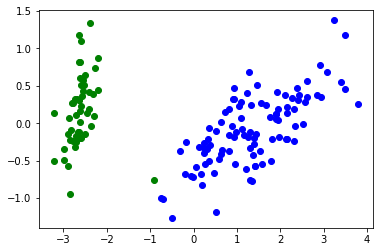

In [6]:
from sklearn.cluster import MeanShift
ms=MeanShift()
ms.fit(pca_df)
print(ms.labels_)

print(ms.cluster_centers_)
ms_df=pd.DataFrame(pca_df)

plt.scatter(ms_df[ms.labels_ == 0].iloc[:,0],ms_df[ms.labels_ == 0].iloc[:,1],color='blue')

plt.scatter(ms_df[ms.labels_ == 1].iloc[:,0],ms_df[ms.labels_ == 1].iloc[:,1],color='green')
plt.scatter(ms_df[ms.labels_ == 2].iloc[:,0],ms_df[ms.labels_ == 2].iloc[:,1],color='red')
plt.scatter(ms_df[ms.labels_ == 3].iloc[:,0],ms_df[ms.labels_ == 3].iloc[:,1],color='red')

print('predicting label')
ms.predict(pca.transform(np.array([[1,2,1,2]])))


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 2 1 2 1 2 1 2 2 2 2 1 2 1 2 2 2 2 1 2 1 1
 1 1 1 3 1 2 2 2 2 1 2 1 1 2 2 2 2 1 2 2 2 2 2 1 2 2 3 1 3 3 3 4 2 4 3 4 3
 3 3 1 1 3 3 4 4 1 3 1 4 1 3 3 1 1 3 3 4 4 3 1 3 4 3 3 1 3 3 3 1 3 3 3 1 3
 3 1]
[[ 0.          4.          0.04519379  2.        ]
 [ 1.          9.          0.07556747  2.        ]
 [ 2.          6.          0.0881176   2.        ]
 [ 7.         10.          0.20638296  3.        ]
 [ 3.         11.          0.20845878  3.        ]
 [12.         14.          0.25971974  5.        ]
 [ 8.         15.          0.55032574  6.        ]
 [ 5.         13.          0.75631503  4.        ]
 [16.         17.          1.44252984 10.        ]]


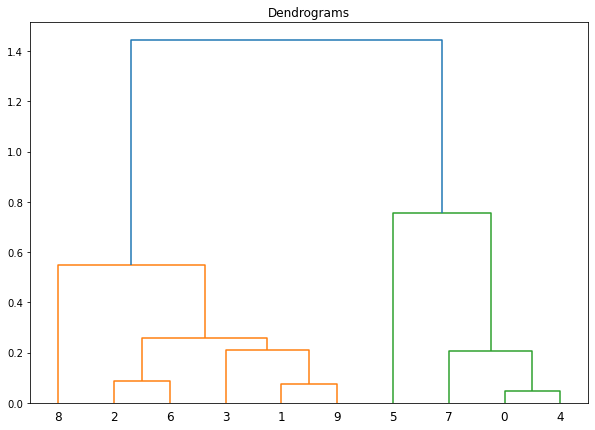

In [16]:
from sklearn.cluster import AgglomerativeClustering

agc=AgglomerativeClustering(n_clusters=5)
agc.fit(pca_df)
print(agc.labels_)

import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
print(shc.linkage(pca_df[:10], method='ward'))
dend = shc.dendrogram(shc.linkage(pca_df[:10], method='ward'))
plt.show()